In [23]:
import csv

import numpy as np
import torch
from torch import Tensor
from PIL import Image
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader
import os
import PIL
import matplotlib.pyplot as plt

In [9]:
DATASET_PATH = "/home/luca-bozzetti/Code/Spade/data/poker_cards"

In [48]:
cards = []

def get_dataloader(path_to_folder: str):
    path_to_folder = os.path.join(DATASET_PATH, path_to_folder)
    csv_path = os.path.join(path_to_folder, "_classes.csv")
    
    X_list = []
    Y_list = []
    
    with open(csv_path, 'r') as f:
      csv_reader = csv.reader(f)
      first_line = next(csv_reader)
      cards.extend(first_line[1:])
      
      # Iterate through the rows in the CSV file
      for row in csv_reader:
        rel_image_path = row[0]
        image = Image.open(os.path.join(path_to_folder, rel_image_path))
        
        # Define a transform to convert PIL image to a Torch tensor
        transform = transforms.Compose([
            transforms.PILToTensor()
        ])
    
        # Convert the PIL image to Torch tensor
        img_tensor = transform(image)
        
        # Add the created tensors to the list
        X_list.append(img_tensor)
        Y_list.append(torch.tensor(list(map(int, row[1:]))))
      
      x: Tensor = torch.stack(X_list)
      y: Tensor = torch.stack(Y_list)
      dataset = TensorDataset(x, y)
      return DataLoader(dataset, batch_size=1, shuffle=True)
        
dl = get_dataloader("test")
print(dl)
print(cards)

[' 10 Diamonds', ' 10 Hearts', ' 10 Spades', ' 10 Trefoils', ' 2 Diamonds', ' 2 Hearts', ' 2 Spades', ' 2 Trefoils', ' 3 Diamonds', ' 3 Hearts', ' 3 Spades', ' 3 Trefoils', ' 4 Diamonds', ' 4 Hearts', ' 4 Spades', ' 4 Trefoils', ' 5 Diamonds', ' 5 Hearts', ' 5 Spades', ' 5 Trefoils', ' 59', ' 6 Diamonds', ' 6 Hearts', ' 6 Spades', ' 6 Trefoils', ' 7 Diamonds', ' 7 Hearts', ' 7 Spades', ' 7 Trefoils', ' 8 Diamonds', ' 8 Hearts', ' 8 Spades', ' 8 Trefoils', ' 9 Diamonds', ' 9 Hearts', ' 9 Spades', ' 9 Trefoils', ' A Diamonds', ' A Hearts', ' A Spades', ' A Trefoils', ' J Diamonds', ' J Hearts', ' J Spades', ' J Trefoils', ' K Diamonds', ' K Hearts', ' K Spades', ' K Trefoils', ' Q Diamonds', ' Q Hearts', ' Q Spades', ' Q Trefoils']


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0])
[' 10 Diamonds', ' 10 Hearts', ' 10 Spades', ' 10 Trefoils', ' 2 Diamonds', ' 2 Hearts', ' 2 Spades', ' 2 Trefoils', ' 3 Diamonds', ' 3 Hearts', ' 3 Spades', ' 3 Trefoils', ' 4 Diamonds', ' 4 Hearts', ' 4 Spades', ' 4 Trefoils', ' 5 Diamonds', ' 5 Hearts', ' 5 Spades', ' 5 Trefoils', ' 59', ' 6 Diamonds', ' 6 Hearts', ' 6 Spades', ' 6 Trefoils', ' 7 Diamonds', ' 7 Hearts', ' 7 Spades', ' 7 Trefoils', ' 8 Diamonds', ' 8 Hearts', ' 8 Spades', ' 8 Trefoils', ' 9 Diamonds', ' 9 Hearts', ' 9 Spades', ' 9 Trefoils', ' A Diamonds', ' A Hearts', ' A Spades', ' A Trefoils', ' J Diamonds', ' J Hearts', ' J Spades', ' J Trefoils', ' K Diamonds', ' K Hearts', ' K Spades', ' K Trefoils', ' Q Diamonds', ' Q Hearts', ' Q Spades', ' Q Trefoils']
tensor([[18],
        [24],
        [28],
        [32]])
 5 Spades
 6 Trefoi

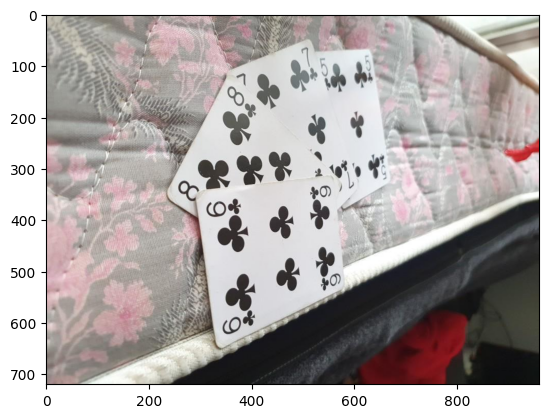

In [47]:
counter = 0
for x_batch, y_batch in dl:
    if counter == 1:
        break
    counter += 1
    image1 = x_batch[0]
    y = y_batch[0]
    
    plt.imshow(image1.permute(1,2,0))
    print(y)
    print(cards)
    indeces = y.nonzero()
    print(indeces)
    for index in indeces:
        print(cards[index])